In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [102]:
# import galton.csv (a "classic" dataset) as a pandas DataFrame.
gt_df = pd.read_csv("galton.csv")
gt_df

,family,father,mother,sex,height,nkids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4
...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8


1. Explore this dataset.  What types of preprocessing will you go through before modeling?


##Check missing values, outliers, endcoing categorical values, find important features.

In [103]:
# check missing values
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   family  898 non-null    object 
 1   father  898 non-null    float64
 2   mother  898 non-null    float64
 3   sex     898 non-null    object 
 4   height  898 non-null    float64
 5   nkids   898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [104]:
#check any outliers
gt_df.describe()

,father,mother,height,nkids
count,898.000000,898.000000,898.000000,898.000000
mean,69.232851,64.084410,66.760690,6.135857
std,2.470256,2.307025,3.582918,2.685156
min,62.000000,58.000000,56.000000,1.000000
25%,68.000000,63.000000,64.000000,4.000000
50%,69.000000,64.000000,66.500000,6.000000
75%,71.000000,65.500000,69.700000,8.000000
max,78.500000,70.500000,79.000000,15.000000


C:\Users\mehed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


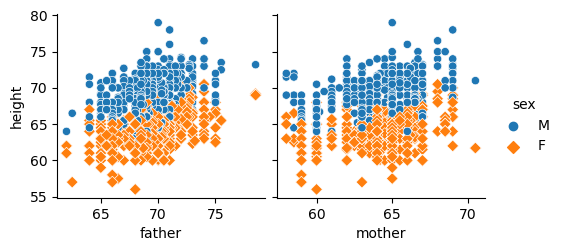

In [105]:
# indentify height relation from plot
sns.pairplot(gt_df,hue= 'sex',x_vars=['father','mother'], y_vars='height',markers=['o', 'D'])

In [106]:
# endcoing categorical values
le = LabelEncoder()
gt_df['sex'] = le.fit_transform(gt_df['sex'])
gt_df['family'] = le.fit_transform(gt_df['family'])
gt_df

,family,father,mother,sex,height,nkids
0,0,78.5,67.0,1,73.2,4
1,0,78.5,67.0,0,69.2,4
2,0,78.5,67.0,0,69.0,4
3,0,78.5,67.0,0,69.0,4
4,107,75.5,66.5,1,73.5,4
...,...,...,...,...,...,...
893,39,68.5,65.0,1,68.5,8
894,39,68.5,65.0,1,67.7,8
895,39,68.5,65.0,0,64.0,8
896,39,68.5,65.0,0,63.5,8


In [107]:
# find corretions
gt_df[['father','mother','sex','height']].corr()

,father,mother,sex,height
father,1.000000,0.073665,-0.027148,0.275355
mother,0.073665,1.000000,-0.035617,0.201655
sex,-0.027148,-0.035617,1.000000,0.714258
height,0.275355,0.201655,0.714258,1.000000


In [108]:
# split data frame to test and tain set and our target is kid's height

X=gt_df[['father','mother','sex']]
Y=gt_df[['height']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=105)

2. Fit a linear model to the data.  Attend to the following considerations:
    * Interaction terms.
    * Regularization (if any).
    * Are the assumptions of linear regression satisfied?
    * Assessing model fit.

Coefficients: 
 [[0.41224615 0.30859808 5.11990504]]
MSE: 4.47
R2: 0.67


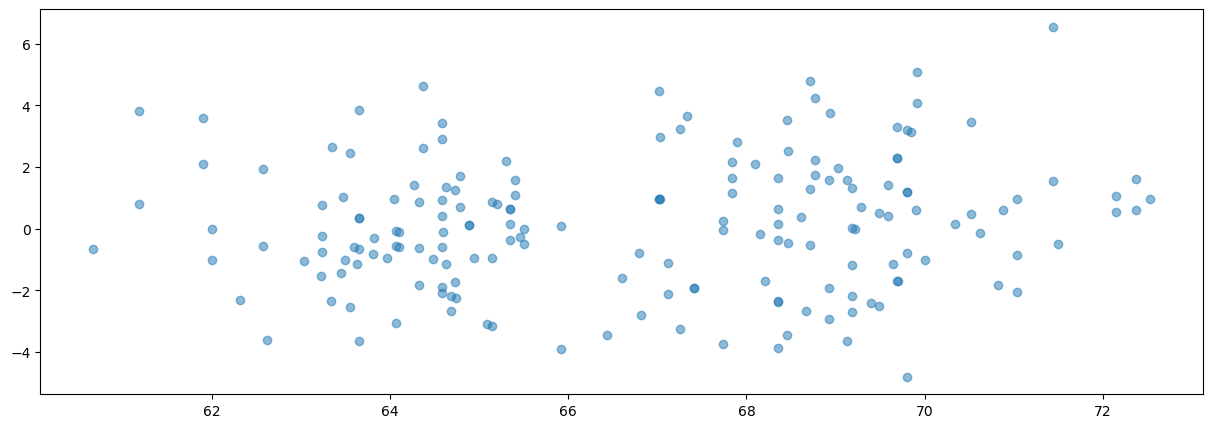

In [109]:
#Linear Regression

reg = LinearRegression()
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_test)
residuals = Y_test - Y_pred



print("Coefficients: \n", reg.coef_)
print("MSE: %.2f" % mean_squared_error(Y_test, Y_pred))
print("R2: %.2f" % r2_score(Y_test, Y_pred))
plt.figure(figsize=(15, 5))
plt.scatter(Y_pred, residuals, alpha=0.5)

In linear regression residual are well spreaded and r^2 is 0.67 which is not so bad.

In [110]:
# predict the height of a child whose father is 50 inches and whose mother is 70 inches tall.
father_height = 50
mother_height = 70
child_sex_boy = 1
child_sex_girl = 0
child_height_pred_boy = reg.predict([[father_height, mother_height, child_sex_boy]])
child_height_pred_girl = reg.predict([[father_height, mother_height, child_sex_girl]])
print(f"Predicted height of child (father: {father_height}, mother: {mother_height}, sex: {'Boy'}): {child_height_pred_boy[0]}")
print(f"Predicted height of child (father: {father_height}, mother: {mother_height}, sex: {'Girl'}): {child_height_pred_girl[0]}")

Predicted height of child (father: 50, mother: 70, sex: Boy): [63.09845533]
Predicted height of child (father: 50, mother: 70, sex: Girl): [57.97855029]


C:\Users\mehed\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mehed\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [118]:
lso = Lasso(alpha=0.05)
lso.fit(X_train, Y_train)

Y_lso_pred = lso.predict(X_test)


print("Coefficients: \n", lso.coef_)
print("MSE: %.2f" % mean_squared_error(Y_test, Y_lso_pred))
print("R2: %.2f" % r2_score(Y_test, Y_lso_pred))


Coefficients: 
 [0.40438792 0.29741223 4.91691346]
MSE: 4.53
R2: 0.67


There is a difference in the distribution of heights dependent on sex. Note that we have access to father heights, mother heights, son heights, and daughter heights. Discuss how you would model
𝑃(sex=M|height=𝑥)
 
as a function of  𝑥
 .
Attend to the following considerations:

Model selection.
Verification of model assumptions.
Assessing model fit.

In [115]:
# predict the probability that a person is male if they are 70 inches tall based on your fit model.

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

NX=gt_df[['father','mother','height']]
NY=gt_df['sex']
NX_train, NX_test, NY_train, NY_test = train_test_split(NX, NY, test_size=0.2, random_state=105)

reg = LogisticRegression()
reg.fit(NX_train, NY_train)
NY_pred = reg.predict(NX_test)

NY_pred = NY_pred.astype(int)

accuracy = accuracy_score(NY_test, NY_pred)
report = classification_report(NY_test, NY_pred)
cm = confusion_matrix(NY_test, NY_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9
Confusion Matrix:
[[80 11]
 [ 7 82]]


The model accuracy is good and the confusion matrix support it.

In [117]:
height_70_inches = pd.DataFrame({'father': [0], 'mother': [0], 'height': [70]})
probability_male = reg.predict_proba(height_70_inches)[:, 1]

print(f"Probability of being male if 70 inches tall: {probability_male[0]:.2f}")

Probability of being male if 70 inches tall: 1.00


In [121]:
Male = gt_df[(gt_df['height'] == 70) & (gt_df['sex'] == '1')]
num_male_height_70 = Male .shape[0]
print(f"Number of males with height 70 inches: {num_male_height_70}")

Number of males with height 70 inches: 0


so the probability is not correct 